In [45]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import warnings


In [46]:
df = pd.read_csv(r'E:\Data Science\ML Projects\ml project krish\notebook\Data\stud.csv')

In [47]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
X = df.drop(columns=['math_score'])
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [49]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [50]:
X.shape, y.shape

((1000, 7), (1000,))

In [51]:
print('Categories in gender: ', end=' ')
print(df['gender'].unique())

print('Categories in Race/ethinicity: ', df['race_ethnicity'].unique())
print('Categories in Parential level education: ', df['parental_level_of_education'].unique())
print('Categories in Lunch: ', df['lunch'].unique())
print('Categories in Test preparation course: ', df['test_preparation_course'].unique())

Categories in gender:  ['female' 'male']
Categories in Race/ethinicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Parential level education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in Lunch:  ['standard' 'free/reduced']
Categories in Test preparation course:  ['none' 'completed']


In [52]:
# Create column transformer to transform data
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)


In [53]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [54]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
X_train

((800, 19), (200, 19))

In [59]:
# create an evalution matrics 
def evalute_model(true, predication):
    mse = mean_squared_error(true, predication)
    mae = mean_absolute_error(true, predication)
    rmse = np.sqrt(mean_squared_error(true, predication))
    r2 = r2_score(true, predication)

    return mse, mae, rmse, r2 

In [77]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KneighboursRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'SVM': SVR()
}

model_list = []
r2_list_test = []
r2_list_train = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # make predications 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evalute train and test model 
    train_mse, train_mae, train_rmse, train_r2 = evalute_model(y_train, y_train_pred)
    test_mse, test_mae, test_rmse, test_r2 = evalute_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])    
    print('Model Performance for train set')
    print('-MSE: {:.4f}'.format(train_mse))
    print('-MAE: {:.4f}'.format(train_mae))
    print('-RMSE: {:.4f}'.format(train_rmse))
    print('-R2: {:.4f}'.format(train_r2))
    r2_list_train.append(train_r2)

    print('--------------------------------------------')

    print('Model performance for test set')
    print('-MSE: {:.4f}'.format(test_mse))
    print('-MAE: {:.4f}'.format(test_mae))
    print('-RMSE: {:.4f}'.format(test_rmse))
    print('-R2: {:.4f}'.format(test_r2))
    r2_list_test.append(test_r2)

    print('='*30)
    print('\n')



LinearRegression
Model Performance for train set
-MSE: 27.4157
-MAE: 4.1938
-RMSE: 5.2360
-R2: 0.8816
--------------------------------------------
Model performance for test set
-MSE: 32.5953
-MAE: 4.4609
-RMSE: 5.7092
-R2: 0.8533


Ridge
Model Performance for train set
-MSE: 27.4182
-MAE: 4.1929
-RMSE: 5.2362
-R2: 0.8816
--------------------------------------------
Model performance for test set
-MSE: 32.6320
-MAE: 4.4630
-RMSE: 5.7124
-R2: 0.8531


Lasso
Model Performance for train set
-MSE: 41.9020
-MAE: 5.0840
-RMSE: 6.4732
-R2: 0.8190
--------------------------------------------
Model performance for test set
-MSE: 48.1169
-MAE: 5.5796
-RMSE: 6.9366
-R2: 0.7834


KneighboursRegressor
Model Performance for train set
-MSE: 32.3150
-MAE: 4.5500
-RMSE: 5.6846
-R2: 0.8604
--------------------------------------------
Model performance for test set
-MSE: 59.4012
-MAE: 6.2640
-RMSE: 7.7072
-R2: 0.7327


DecisionTreeRegressor
Model Performance for train set
-MSE: 0.2006
-MAE: 0.0362
-RMSE:

In [72]:
model_list

[]

In [79]:
pd.DataFrame(list(zip(model_list,r2_list_test, r2_list_train)), columns=['Model Name', 'R2 Score_test', 'R2_score_train']).sort_values(by=['R2 Score_test'], ascending=False)

,Model Name,R2 Score_test,R2_score_train
0,LinearRegression,0.853305,0.881594
1,Ridge,0.853140,0.881583
5,RandomForestRegressor,0.812264,0.976856
2,Lasso,0.783450,0.819029
6,SVM,0.770911,0.797117
3,KneighboursRegressor,0.732665,0.860434
4,DecisionTreeRegressor,0.697381,0.999134


In [81]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 85.33


Text(0, 0.5, 'Predicated')

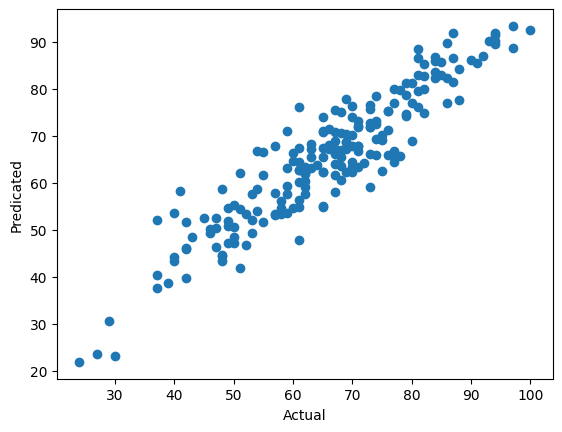

In [82]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicated')

<Axes: xlabel='math_score'>

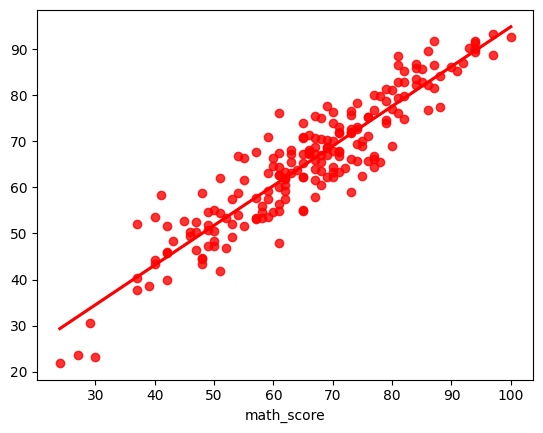

In [85]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [86]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
37,50,50.601140,-0.601140
726,65,70.747151,-5.747151
846,91,85.364557,5.635443
295,67,64.054238,2.945762
924,74,72.583471,1.416529
...,...,...,...
839,66,67.196714,-1.196714
810,51,41.928463,9.071537
930,67,70.726559,-3.726559
616,37,37.706084,-0.706084
